## Project 2

Nikolaos Stavrinos 2631

Konstantinos Konstantinidis 2546

## Importing the libraries

In [1]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 100  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

## Loading Data

In [2]:
data = pd.read_excel("business_survey_results.xlsx", engine='openpyxl')
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention

X = data.loc[:, "V2":]  # independent variables data
y = data.V1  # dependednt variable data

data


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130
0,Ατομική Επιχείρηση,10.0,10\tΒιομηχανία τροφίμων,Ελαφρά διαφοροποιημένα σε σχέση με τον ανταγων...,Ελαφρά διαφοροποιημένα σε σχέση με τον ανταγων...,90-100%,90-100%,27.0,55.0,3.0,...,0.00,0.00,NaN,NaN,NaN,NaN,-15600.11,-24803.13,-11462.9,5725.19
1,Ατομική Επιχείρηση,1.0,"01\tΦυτική και ζωική παραγωγή, θήρα και συναφε...",Αρκετά διαφοροποιημένα σε σχέση με τον ανταγων...,Αρκετά διαφοροποιημένα σε σχέση με τον ανταγων...,90-100%,90-100%,20.0,74.0,0.0,...,0.00,0.00,NaN,NaN,NaN,0.00,4890.63,845.97,1320.77,-1912.84
2,Ατομική Επιχείρηση,46.0,"46\tΧονδρικό εμπόριο, εκτός από το εμπόριο μηχ...",Ίδια με τον ανταγωνισμό,Ίδια με τον ανταγωνισμό,40-60%,60-80%,3.0,82.0,0.0,...,5914.97,2716.37,NaN,NaN,NaN,NaN,5753.44,-1508.88,5680.15,6699.75
3,ΟΕ,47.0,"47\tΛιανικό εμπόριο, εκτός από το εμπόριο μηχα...",Ίδια με τον ανταγωνισμό,Αρκετά διαφοροποιημένα σε σχέση με τον ανταγων...,80-90%,90-100%,2.0,25.0,47.0,...,0.00,0.00,1913.96,4364.040,3868.04,0.00,19728.35,16688.95,15104.4,-8525.16
4,ΟΕ,69.0,69\tΝομικές και λογιστικές δραστηριότητες,Ελαφρά διαφοροποιημένα σε σχέση με τον ανταγων...,Ίδια με τον ανταγωνισμό,90-100%,60-80%,43.0,NaN,8.0,...,0.00,0.00,0.00,0.000,0.00,0.00,-3886.56,-11548.36,"-6.818 ,89","-396 ,57"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,ΑΕ,46.0,"46\tΧονδρικό εμπόριο, εκτός από το εμπόριο μηχ...",Ελαφρά διαφοροποιημένα σε σχέση με τον ανταγων...,Αρκετά διαφοροποιημένα σε σχέση με τον ανταγων...,60-80%,80-90%,10.0,80.0,NaN,...,1023950.86,975574.25,382068.07,432830.123,470206.92,500218.13,-155831.89,-150692.58,-187289,-120871
239,ΙΚΕ,3.0,03\tΑλιεία και υδατοκαλλιέργεια,Ίδια με τον ανταγωνισμό,Ίδια με τον ανταγωνισμό,90-100%,90-100%,25.0,50.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,ΟΕ,13.0,13\tΠαραγωγή κλωστοϋφαντουργικών υλών,Ίδια με τον ανταγωνισμό,Ίδια με τον ανταγωνισμό,40-60%,80-90%,20.0,50.0,0.0,...,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0,0
241,Άλλη μορφή,25.0,"25\tΚατασκευή μεταλλικών προϊόντων, με εξαίρεσ...",Πολύ διαφοροποιημένα σε σχέση με τον ανταγωνισμό,Ελαφρά διαφοροποιημένα σε σχέση με τον ανταγων...,60-80%,90-100%,20.0,20.0,20.0,...,2380374.67,1943502.77,129535.78,119149.750,58872.89,235540.36,53254.42,-37260.05,243555,223290


## Converting categorical values to numerical

In [3]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()

X_numerical=pd.DataFrame()
data_numerical=pd.DataFrame()


for i in range(2,len(data.columns)+1):
    temp="V"+str(i)
    data_numerical[temp]=ord_enc.fit_transform(data[temp].astype(str))

data_numerical["V1"]=ord_enc.fit_transform(data["V1"].astype(str))  

data_numerical=data_numerical.where(~data.isna(),data)

print("The classes are :",ord_enc.classes_)


data_numerical

The classes are : ['nan' 'Άλλη μορφή' 'ΑΕ' 'Ατομική Επιχείρηση' 'ΕΠΕ' 'ΙΚΕ' 'ΟΕ']


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V122,V123,V124,V125,V126,V127,V128,V129,V130,V1
0,1,2,3,3,4,4,15,21,11,5,...,0.0,NaN,NaN,NaN,NaN,11.0,18.0,4,167,3
1,0,0,2,2,4,4,11,26,0,29,...,0.0,NaN,NaN,NaN,0.0,132.0,160.0,75,16,3
2,18,18,1,1,1,2,17,33,0,5,...,22.0,NaN,NaN,NaN,NaN,140.0,9.0,168,181,3
3,19,19,1,2,3,4,10,9,15,13,...,0.0,11.0,28.0,25.0,0.0,87.0,80.0,81,48,6
4,26,26,3,1,4,2,26,NaN,21,23,...,0.0,1.0,1.0,0.0,0.0,31.0,1.0,45,35,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,18,18,3,2,2,3,1,32,NaN,39,...,43.0,25.0,27.0,31.0,31.0,10.0,8.0,17,4,2
239,12,1,1,1,4,4,14,19,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
240,2,3,1,1,1,3,11,19,0,8,...,0.0,1.0,1.0,0.0,0.0,46.0,53.0,55,53,6
241,8,9,4,3,2,4,11,6,6,8,...,13.0,4.0,6.0,38.0,23.0,137.0,29.0,109,108,1


## Converting NaN values to the mean of their column 

In [4]:
data_numerical=data_numerical.fillna(value=data_numerical.mean())

y=data_numerical.V1

In [5]:
corrmat = data_numerical.corr()
V1_corm=corrmat["V1"][:]
V1_sorted=V1_corm.sort_values(ascending=False)
V1_sorted[0:6]

V1     1.000000
V12    0.156737
V15    0.130720
V51    0.115972
V93    0.109692
V33    0.108875
Name: V1, dtype: float64

## Finding the cells with the highest coorelation to the first column

In [6]:
X_numerical["V12"]=data_numerical["V12"]
X_numerical["V15"]=data_numerical["V15"]
X_numerical["V51"]=data_numerical["V51"]
X_numerical["V93"]=data_numerical["V93"]
X_numerical["V33"]=data_numerical["V33"]
X_numerical

,V12,V15,V51,V93,V33
0,2.000000,2.000000,4.0,6.000000,13.000000
1,4.000000,8.000000,4.0,7.000000,8.010471
2,5.000000,8.000000,4.0,6.000000,8.010471
3,4.000000,5.777293,4.0,5.000000,1.000000
4,5.000000,9.000000,4.0,10.000000,1.000000
...,...,...,...,...,...
238,1.000000,2.000000,4.0,3.000000,4.000000
239,2.000000,8.000000,4.0,5.737778,2.000000
240,3.016878,8.000000,4.0,2.000000,17.000000
241,4.000000,5.777293,4.0,10.000000,4.000000


## Standardising Variables

If you want to compare different variables that have different units, are very different variances, it is a good idea to first standardise the variables.

In [7]:
standardisedX = scale(X_numerical)
standardisedX = pd.DataFrame(standardisedX, index=X_numerical.index, columns=X_numerical.columns)

## Principal Component Analysis



In [8]:
pca = PCA().fit(standardisedX)

You can get a summary of the principal component analysis results using the `pca_summary()` function below, which simulates the output of R's `summary` function on a PCA model:

In [9]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [10]:
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.156654,0.267570,0.267570
PC2,1.029720,0.212065,0.479635
PC3,0.997626,0.199052,0.678686
PC4,0.905573,0.164012,0.842699
PC5,0.886852,0.157301,1.000000


## Deciding How Many Principal Components to Retain


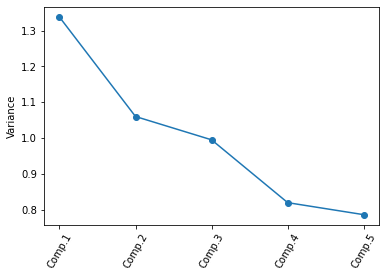

In [11]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

We see that the variance is above 1 for principal components 1, 2 Therefore we  retain the first two principal components.



## Loadings for the Principal Components



In [12]:
pca.components_[0]

array([ 0.49704659, -0.16042275, -0.36035348, -0.50735366, -0.58304962])

In [13]:
np.sum(pca.components_[0]**2)

0.9999999999999998

In [14]:
pca.components_[1]

array([-0.47327292,  0.42745173, -0.67222732,  0.22494433, -0.30134407])

In [15]:
np.sum(pca.components_[1]**2)

0.9999999999999992

## Scatterplots of the Principal Components


/home/nikos/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


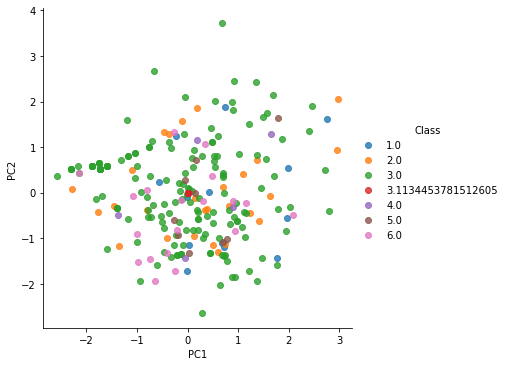

In [16]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

## Linear Discriminant Analysis


In [17]:
lda = LinearDiscriminantAnalysis().fit(standardisedX, y.astype(str))

## Loadings for the Discriminant Functions


In [18]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, standardisedX, out=True)

Coefficients of linear discriminants:


,LD1,LD2,LD3,LD4,LD5
V12,0.628812,0.776034,-0.250872,-0.179602,-0.099680
V15,0.640801,-0.510118,-0.014806,-0.541019,0.276262
V51,0.358879,-0.382675,-0.564944,0.626149,-0.226530
V93,0.382070,0.250950,0.376085,0.498103,0.663589
V33,0.297177,0.037589,0.692920,-0.053811,-0.693603


In [19]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardisedX, y.astype(str), True)

class
['3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '4.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0'
 '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3.0' '3

/home/nikos/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


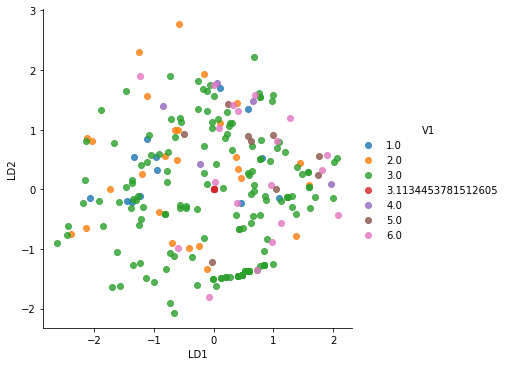

In [21]:
sns.lmplot("LD1", "LD2", lda_values["x"].join(y), hue="V1", fit_reg=False);
